In [80]:
from sklearn import datasets
import numpy as np

In [81]:
iris = datasets.load_iris()
X = iris.data[: , [2,3]]
y = iris.target
print('class labels:', np.unique(y))

class labels: [0 1 2]


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [83]:
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [84]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [85]:
from sklearn.linear_model import Perceptron

In [86]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [87]:
y_pred  = ppn.predict(X_test_std)
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [88]:
print('misscalssified: %d'% (y_test!=y_pred).sum())
(y_test!=y_pred).sum()/y_pred.shape[0]

misscalssified: 1


0.022222222222222223

In [89]:
y_pred.shape[0]

45

In [90]:
from sklearn.metrics import accuracy_score, precision_score

In [91]:
print('Accuracy: %.3f'% accuracy_score(y_pred,y_test))

Accuracy: 0.978


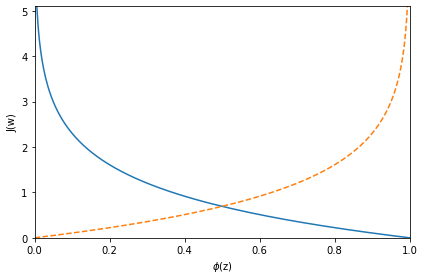

In [92]:
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1+np.exp(-z))
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
# plt.legend(loc='best')
plt.tight_layout()
plt.show()

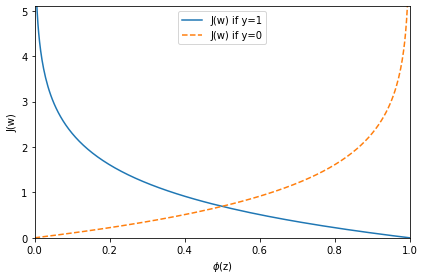

In [93]:
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1+np.exp(-z))
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [94]:
np.clip(-15,-4,4)

-4

In [136]:
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_iterations=100, random_seed=1): 
        self.eta = eta
        self.n_iterations = n_iterations
        self.random_seed = random_seed
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_seed)
        self.w = rgen.normal(0, 0.01, size=X.shape[1])
        self.w0 = rgen.normal(0, 0.01, size=1)

        self.costs = []
        for i in range(self.n_iterations):
            z = self.net_input(X)
            pred = sigmoid(z)
            delta_w = np.dot(X.T, (y-pred)) * self.eta
            delta_w0 = np.sum(X) *self.eta
            self.w += delta_w
            self.w0 += delta_w0
            self.costs.append(np.dot(-y,np.log(pred))-np.dot((1-y),np.log(1-pred)))
        print(self.costs)
        

    def net_input(self, X):
        return np.dot(X, self.w) + self.w0    
    
    def predict(self, X):
        return np.where(sigmoid(self.net_input(X)) >= 0.5, 1, 0)

In [137]:
logReg = LogisticRegression()


In [138]:
X_train_01 = X_train[(y_train==0) | (y_train==1)]
y_train_01 = y_train[(y_train==0)| (y_train==1)]

In [139]:
np.unique(y_train_01)

array([0, 1])

In [140]:
logReg.fit(X_train_01, y_train_01)

[47.85033543935147, 838.386907842014, 2511.529372798427, 4184.671872798427, 5857.814372798428, 7530.956872798428, 9204.099372798428, 10877.24187279843, 12550.384372798428, 14223.526872798428, 15896.66937279843, 17569.81187279843, 19242.954372798427, 20916.09687279843, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


C:\Users\DELL\AppData\Local\Temp\ipykernel_22496\1646539844.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-z))
C:\Users\DELL\AppData\Local\Temp\ipykernel_22496\2354987516.py:21: RuntimeWarning: divide by zero encountered in log
  self.costs.append(np.dot(-y,np.log(pred))-np.dot((1-y),np.log(1-pred)))


In [128]:
X_test_01 = X_test[(y_test==0) | (y_test==1)]
y_test_01 = y_test[(y_test==0)| (y_test==1)]

In [129]:
pred = logReg.predict(X_test_01)
accuracy = pred[pred==y_test_01].sum() / len(y_test) 
accuracy


0.3333333333333333

In [130]:
print(pred)
print(y_test_01)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0]
